# coding attention mechanism

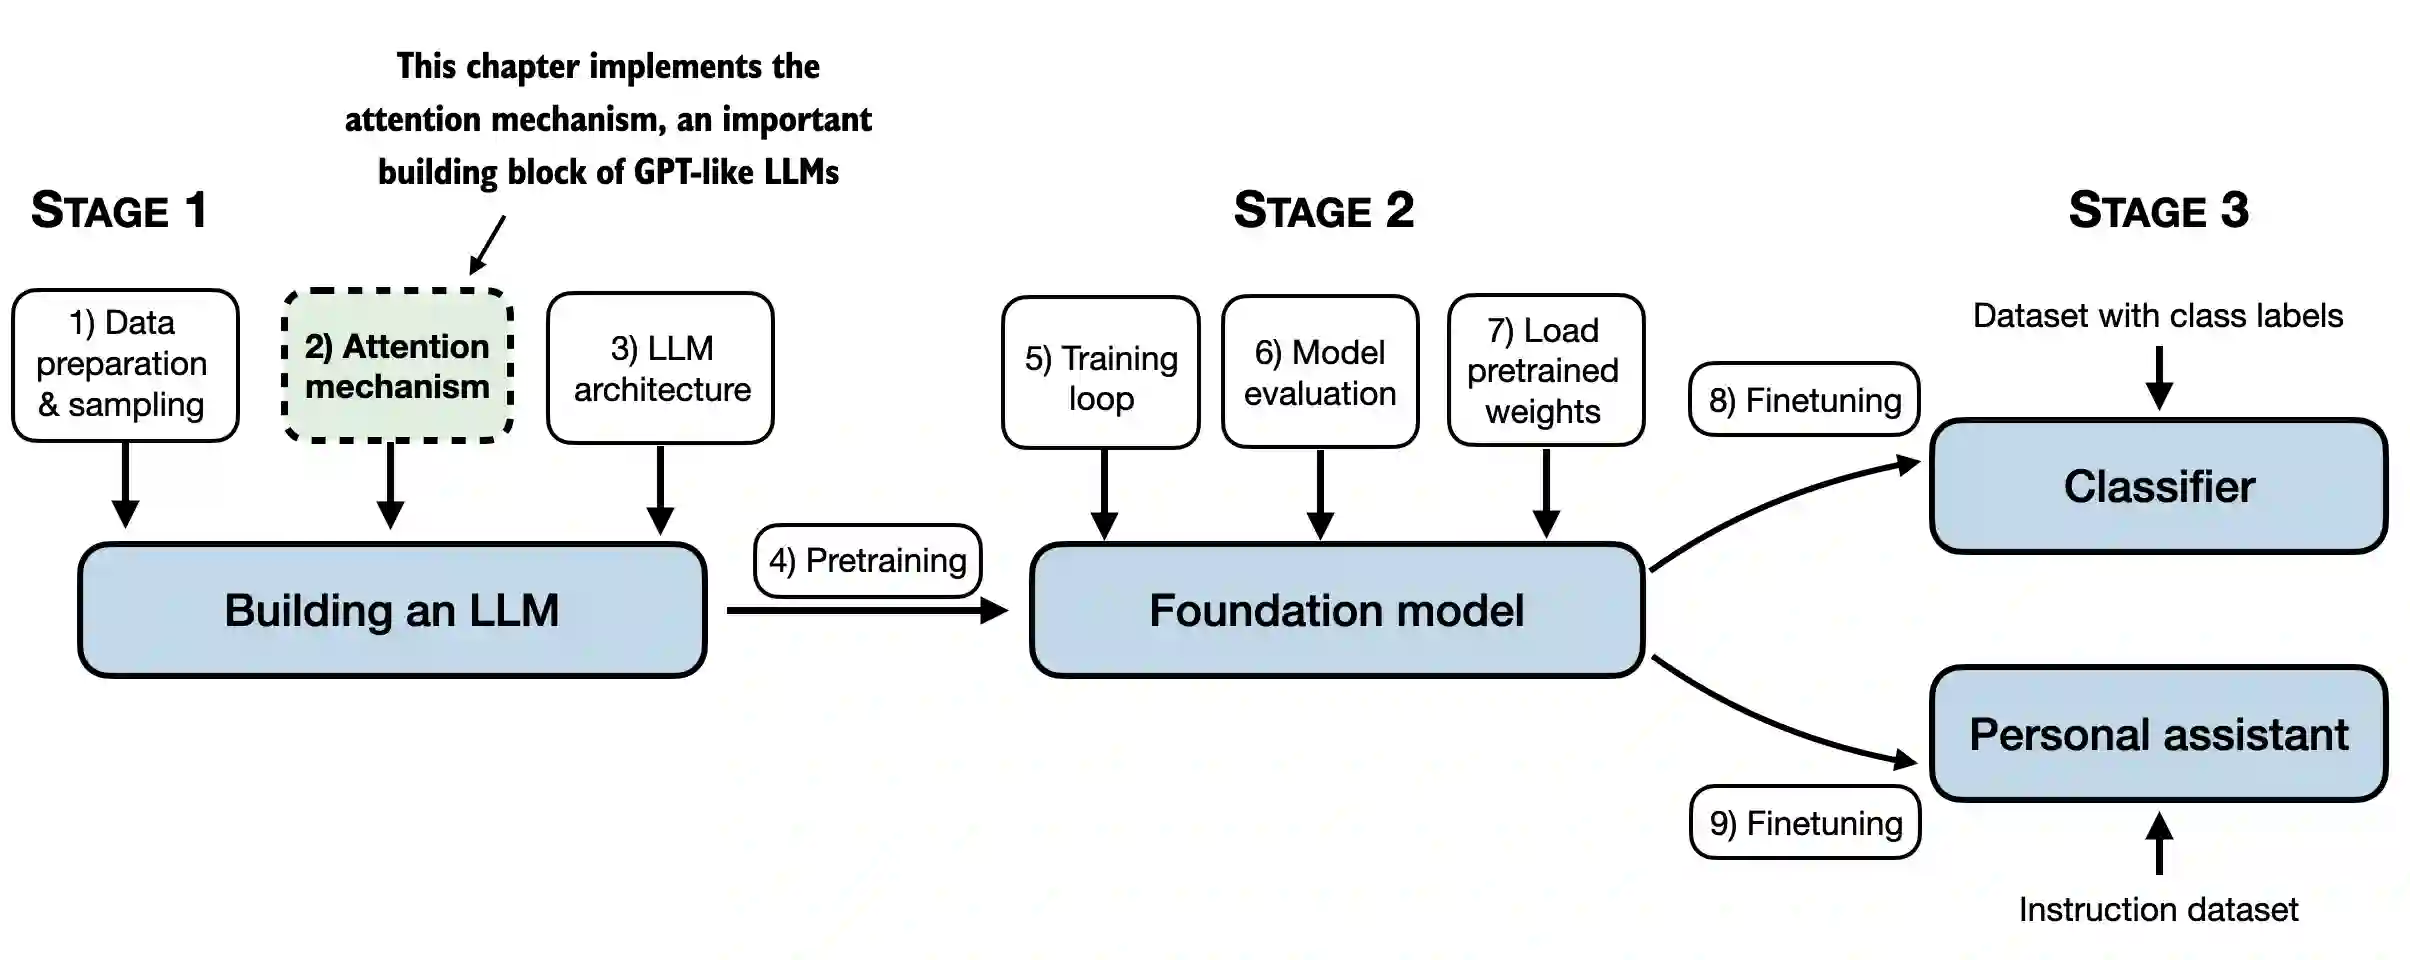

## A simple self-attention mechanism without trainable weights

In [2]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

Step 1: compute unnormalized attention scores 

In [7]:
query = inputs[1]  # 2nd input token is the query

atten_score_2 = torch.empty(inputs.shape[0])

for i , x_i in enumerate(inputs):
    atten_score_2[i] = torch.dot(x_i,query)
    
print(atten_score_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


Step2: Next we need to normalize the attention_scores for interpretability 

In [6]:
atten_score_2_temp = atten_score_2/atten_score_2.sum()

print(f'Attention weights: {atten_score_2_temp}')

print(f'Sum: {atten_score_2_temp.sum()}')

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: 1.0


We can also do the softmax normalization which is prefered (to avoid the extereme case) 

In [9]:
attn_weights_2 = torch.softmax(atten_score_2, dim=0)

print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


Step 3: computing the context vector

In [10]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)

for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i] * x_i
    
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


We do this for all the input sequence

In [11]:
atten_score = torch.zeros(6,6)

for i , x_i in enumerate(inputs):
    for j,x_j in enumerate(inputs):
        atten_score[i,j] = torch.dot(x_i,x_j)
       
print(f'Attention_score: {atten_score}')

Attention_score: tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


We can also do this using matrix multiplication 

In [12]:
atten_score = inputs @ inputs.T
print(f'Attention_score: {atten_score}')

Attention_score: tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


Now we normalize

In [13]:
atten_weights = torch.softmax(atten_score, dim = -1)
print(f'Attention_score: {atten_weights}')

Attention_score: tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


Now we compute all context vectors

In [15]:
all_context_vectors = atten_weights @ inputs

print(atten_weights)

print(inputs)

print(all_context_vectors)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


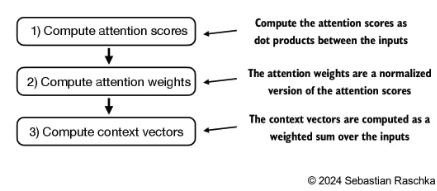

# Self-attention with trainable weight (Scaled dot product attention)

Step 1: Convert input emneddings to query , key and value embeddings

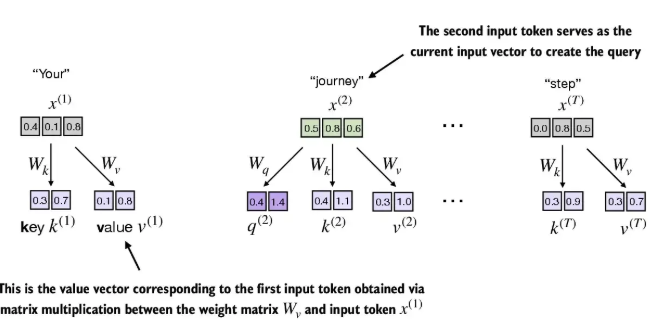

In [16]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [18]:
x_2 = inputs[1] #A 
d_in = inputs.shape[1] #B 
d_out = 2 #C

Next initialize the three weight matrixes Wq, Wk, Wv

In [20]:
torch.manual_seed(123)

W_query = torch.nn.Parameter(torch.rand(d_in , d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in , d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in , d_out), requires_grad=False)

In [21]:
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [22]:
print(W_key)

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])


In [23]:
print(W_value)

Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


Next Step, compute the query, key and value vectors for x_2(journey)

In [25]:
query_2 = x_2 @ W_query 
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value 

print(query_2)
print(key_2)
print(value_2)

tensor([0.4306, 1.4551])
tensor([0.4433, 1.1419])
tensor([0.3951, 1.0037])


Lets generate this for all the inputs

In [26]:
query = inputs @ W_query 
key = inputs @ W_key
value = inputs @ W_value 

print(query)
print(key)
print(value)

tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]])
tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])
tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]])


Step 2: Compute the attention score

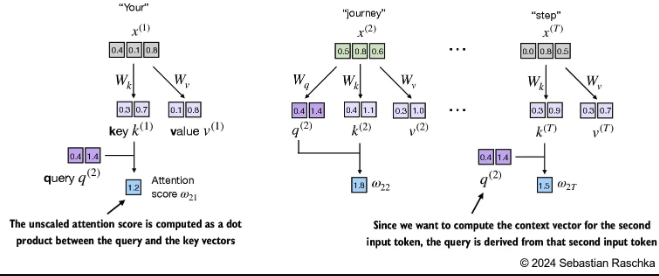

In [30]:
query_2 = query[2]
query_2

tensor([0.4300, 1.4343])

In [32]:
atten_score_2 = query_2 @ key.T
atten_score_2

tensor([1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238])

Lets do it for all the elements of the inputs 

In [34]:
atten_score = query @ key.T
print(atten_score)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


Step 3: Compute attention weights

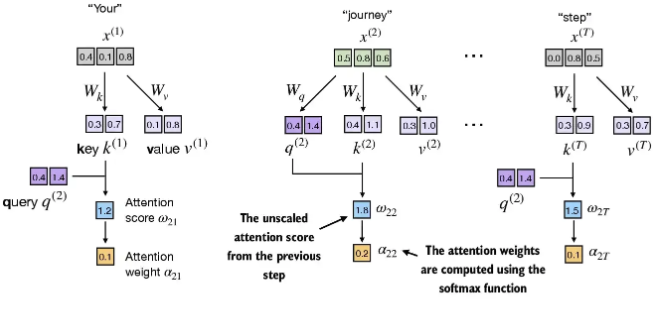

WHich is just normalize the attention_score and before we do that, we need to scale it by sq.root(embedding dimension of d) and then softmax

In [38]:
d_k = d_out

atten_weights_2 = torch.softmax(atten_score_2/d_k ** 0.5 , dim = -1)

print(atten_weights_2)

tensor([0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819])


Lets do that for the whole input

In [39]:
d_k = d_out

atten_weights = torch.softmax(atten_score/d_k ** 0.5 , dim = -1)

print(atten_weights)

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])


Why divide by sqr.root ? 

1. Stability
2. To keep vairance of the dot product close to 1 


Step 4: Compute context vector

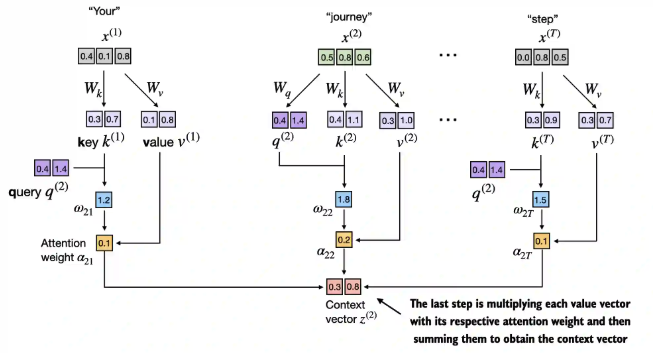

In [46]:
context_vec_2 = atten_weights_2 @ value

context_vec_2

tensor([0.3058, 0.8203])

In [45]:
context_vec = atten_weights @ value

context_vec

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])

## Lets make a python class that will do all of the above

In [54]:
import torch.nn as nn 

class SelfAttention_v1(nn.Module):
    
    def __init__(self, d_in , d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in , d_out))
        self.W_key = nn.Parameter(torch.rand(d_in , d_out))
        self.W_value = nn.Parameter(torch.rand(d_in , d_out))
        
    def forward(self,x):
        keys = x @ self.W_key
        values = x @ self.W_value
        queries = x @ self.W_query
        
        atten_score = queries @ keys.T 
        
        atten_weights = torch.softmax(atten_score/keys.shape[-1] ** 0.5 , dim = -1)
        
        context_vec = atten_weights @ values
        
        return context_vec

In [55]:
torch.manual_seed(123)

sa_v1 = SelfAttention_v1(d_in , d_out)

print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


We can streamline the implementation above using PyTorch's Linear layers, which are equivalent to a matrix multiplication if we disable the bias units

Another big advantage of using nn.Linear over our manual nn.Parameter(torch.rand(...) approach is that nn.Linear has a preferred weight initialization scheme, which leads to more stable model training

In [60]:
import torch.nn as nn 

class SelfAttention_v2(nn.Module):
    
    def __init__(self, d_in , d_out , qkv_bias = False):
        super().__init__()
        self.W_query = nn.Linear(d_in , d_out , bias = qkv_bias)
        self.W_key = nn.Linear(d_in , d_out , bias = qkv_bias)
        self.W_value = nn.Linear(d_in , d_out , bias = qkv_bias)
        
    def forward(self,x):
        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)
        
        atten_score = queries @ keys.T 
        
        atten_weights = torch.softmax(atten_score/keys.shape[-1] ** 0.5 , dim = -1)
        
        context_vec = atten_weights @ values
        
        return context_vec

In [61]:
torch.manual_seed(123)

sa_v2 = SelfAttention_v2(d_in , d_out , qkv_bias = False)

print(sa_v2(inputs))

tensor([[-0.5337, -0.1051],
        [-0.5323, -0.1080],
        [-0.5323, -0.1079],
        [-0.5297, -0.1076],
        [-0.5311, -0.1066],
        [-0.5299, -0.1081]], grad_fn=<MmBackward0>)


### Why do we use the tearms: Key , Query and Value ? 

#### Query: Analogous to the search query in a database. It represents the current token the model is focussing on . 

#### Key: IN attention mechanish, each item in an input sequence has a key. Keys are used to match with the query. 

#### Value: That represents the actual content or representation of the input items. Once the model determines which keys (which parts of input) are most relevant to the query (current focus item), it retrieves the corresponding values

# Causal-attention (masked attention)

It restricts the model to only factor in tokens that occured before current query

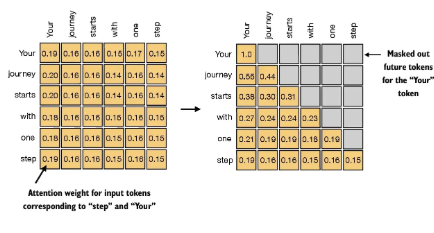

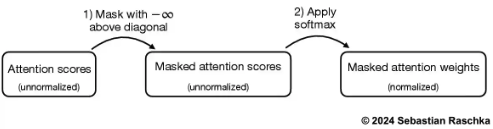

In [62]:
context_length = atten_score.shape[-1]

mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = atten_score.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.9231,   -inf,   -inf,   -inf,   -inf,   -inf],
        [1.2705, 1.8524,   -inf,   -inf,   -inf,   -inf],
        [1.2544, 1.8284, 1.7877,   -inf,   -inf,   -inf],
        [0.6973, 1.0167, 0.9941, 0.5925,   -inf,   -inf],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707,   -inf],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [63]:
attn_weights = torch.softmax(masked / key.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3986, 0.6014, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2526, 0.3791, 0.3683, 0.0000, 0.0000, 0.0000],
        [0.2265, 0.2839, 0.2794, 0.2103, 0.0000, 0.0000],
        [0.1952, 0.2363, 0.2331, 0.1820, 0.1534, 0.0000],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])


# Masking additional attention weights with dropout

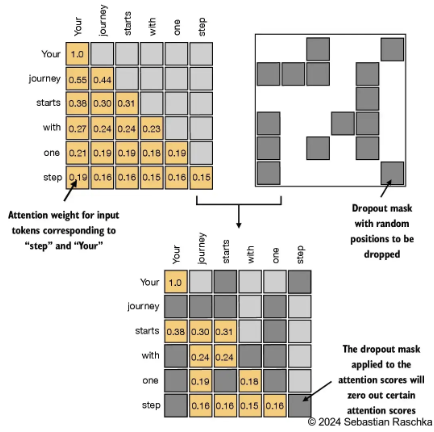

In [ ]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) # dropout rate of 50%
example = torch.ones(6, 6) 

print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


Applying this to attention_weights 

In [65]:

print(dropout(atten_score))

tensor([[1.8463, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 3.6222, 0.0000, 1.1155, 3.0879],
        [0.0000, 3.6568, 3.5754, 2.1309, 1.1016, 3.0475],
        [0.0000, 0.0000, 1.9881, 1.1851, 0.0000, 1.6949],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5413, 1.4614],
        [1.7990, 2.6331, 0.0000, 1.5364, 0.7874, 2.1993]])


## Lets build a causal attention class

That can handle a batch of inputs

In [66]:
batch = torch.stack((inputs , inputs ), dim = 0)

batch.shape

torch.Size([2, 6, 3])

In [86]:
import torch.nn as nn 

class CausalAttention(nn.Module):
    
    def __init__(self, d_in , d_out , context_length ,dropout_rate, qkv_bias = False ):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in , d_out , bias = qkv_bias)
        self.W_key = nn.Linear(d_in , d_out , bias = qkv_bias)
        self.W_value = nn.Linear(d_in , d_out , bias = qkv_bias)
        self.dropout = torch.nn.Dropout(dropout_rate)
        self.register_buffer('mask' ,torch.triu(torch.ones(context_length, context_length), diagonal=1) )
        
    def forward(self,x):
        b , num_tokens , d_in = x.shape 
        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)
        
        atten_score = queries @ keys.transpose(1,2) 
        
        
        atten_score = atten_score.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        
        
      
        atten_weights = torch.softmax(atten_score/keys.shape[-1] ** 0.5 , dim = -1)
        
        atten_weights = self.dropout(atten_weights)
        
        
        
        context_vec = atten_weights @ values
        
        return context_vec

In [89]:
ca = CausalAttention(d_in , d_out , context_length=batch.shape[1] , qkv_bias = False , dropout_rate = 0.5 )

ca(batch)

tensor([[[-0.3604,  1.1968],
         [-0.3721,  0.6212],
         [-0.2447,  0.4152],
         [-0.1897,  0.3167],
         [-0.2540,  0.4788],
         [-0.3290,  0.6063]],

        [[-0.3604,  1.1968],
         [ 0.0000,  0.0000],
         [-0.4953,  0.8336],
         [-0.3153,  0.4920],
         [-0.3209,  0.7129],
         [-0.1846,  0.4865]]], grad_fn=<UnsafeViewBackward0>)

#  Extending single-head attention to multi-head attention
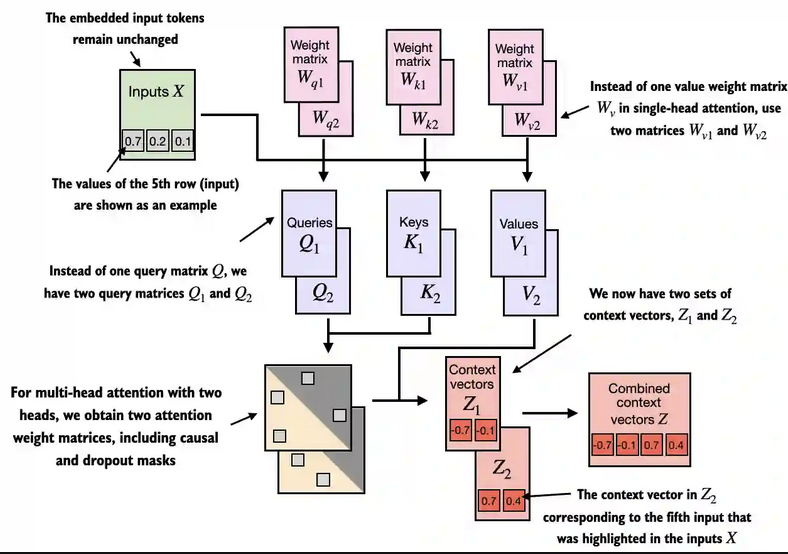

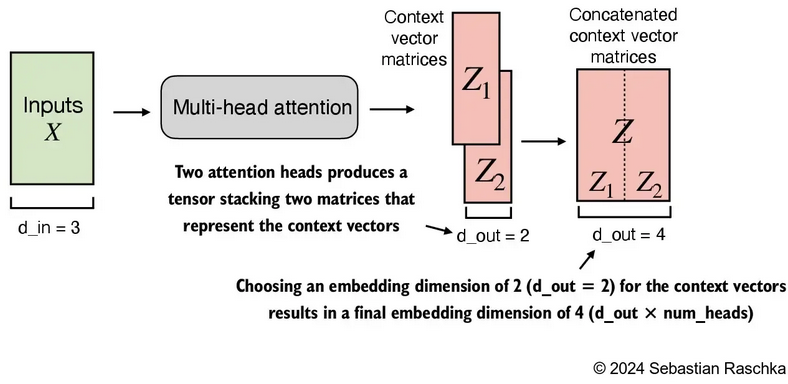

Run the attention mechanism multiple times (in parallel) with different, learned linear projections: the result of multiplying input data (like query, key, value vectors ) by a weight matrix

In code, we can achivee this by implementing a simple MultiHeadAttentionWrapper class that stacks multipple instances of our previous CausalAttention module: 

In [77]:
class MultiHeadAttentionWrapper(nn.Module):
    
    def __init__(self, d_in , d_out , context_length, dropout , num_heads , qkv_bias = False):
        
        super().__init__()
        
        self.heads = nn.ModuleList(
            
            [CausalAttention(d_in , d_out , context_length, dropout , qkv_bias)
             for _ in range(num_heads)]
            
        )
        
    def forward(self , x):
        return torch.cat( [head(x) for head in self.heads], dim = -1)

In [78]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

batch = torch.stack((inputs , inputs ), dim = 0)

batch.shape

torch.Size([2, 6, 3])

In [92]:
context_length = batch.shape[1]
d_in, d_out = 3,2


mha = MultiHeadAttentionWrapper(d_in , d_out , context_length, dropout = 0.0, num_heads = 2, qkv_bias = False)

context_vecs = mha(batch)

print(context_vecs)

tensor([[[ 0.2169, -0.4901,  0.0493, -0.2084],
         [ 0.1299, -0.4922,  0.0664, -0.0267],
         [ 0.1027, -0.4938,  0.0682,  0.0336],
         [ 0.0770, -0.4243,  0.0707,  0.0586],
         [ 0.0658, -0.4189,  0.0247,  0.0639],
         [ 0.0558, -0.3864,  0.0526,  0.0806]],

        [[ 0.2169, -0.4901,  0.0493, -0.2084],
         [ 0.1299, -0.4922,  0.0664, -0.0267],
         [ 0.1027, -0.4938,  0.0682,  0.0336],
         [ 0.0770, -0.4243,  0.0707,  0.0586],
         [ 0.0658, -0.4189,  0.0247,  0.0639],
         [ 0.0558, -0.3864,  0.0526,  0.0806]]], grad_fn=<CatBackward0>)


# Implementing multi-head attention with weight splits


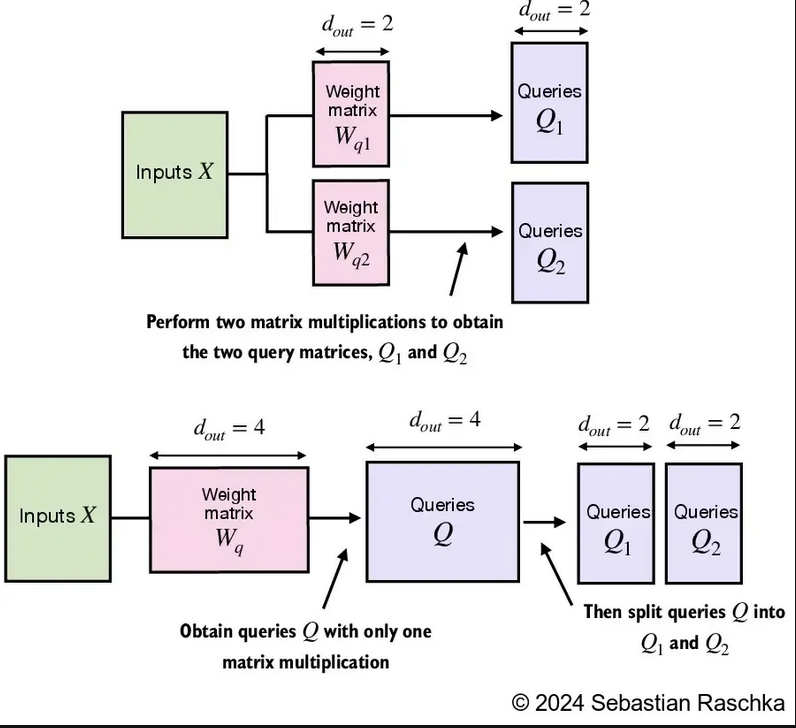

While the above is an intuitive and fully functional implementation of multi-head attention (wrapping the single-head attention CausalAttention implementation from earlier), we can write a stand-alone class called MultiHeadAttention to achieve the same

We don't concatenate single attention heads for this stand-alone MultiHeadAttention class

Instead, we create single W_query, W_key, and W_value weight matrices and then split those into individual matrices for each attention head:



In [97]:
class MultiHeadAttention(nn.Module):
    
    def __init__(self , d_in , d_out , context_length , dropout , num_heads , qkv_bias = False):
        super().__init__()
        
        assert(d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"
            
        self.d_out = d_out 
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads 
        
        self.W_query = nn.Linear(d_in , d_out , bias = qkv_bias)
        self.W_key = nn.Linear(d_in , d_out , bias = qkv_bias)
        self.W_value = nn.Linear(d_in , d_out , bias = qkv_bias)
        
        self.dropout = nn.Dropout(dropout)
        self.out_proj = nn.Linear(d_out , d_out)
        self.register_buffer(
            "mask" , 
            torch.triu(torch.ones(context_length , context_length), diagonal=1)
        )
        
    def forward(self , x): 
        
        b , num_token , d_in = x.shape
        
        keys = self.W_key(x) # shape = b , num_token , d_out
        values = self.W_value(x)
        queries = self.W_query(x)
        
        # split the above matrices into 4-D Byh adding in num_heads into the dimentions 
        
        keys = keys.view(b , num_token , self.num_heads , self.head_dim )
        values = values.view(b , num_token , self.num_heads , self.head_dim )
        queries = queries.view(b , num_token , self.num_heads , self.head_dim )
        
        # transpose - b , num_token , self.num_heads , self.head_dim ---> b , self.num_heads , num_token , self.head_dim
        
        keys = keys.transpose(1,2)
        values = values.transpose(1,2)
        queries = queries.transpose(1,2)
        
        # Compute scaled dot product attemtion 
        
        atten_score = queries @ keys.transpose(2,3) # b , self.num_heads , num_token , num_token
        
        # Use mask to only look at attention for the tokens seen 
        
        mask_bool = self.mask.bool()[:num_token , :num_token]
        
        # use the mask 
        atten_score.masked_fill_(mask_bool, -torch.inf)
        
        # calculate attention wieghts 
        
        atten_weights = torch.softmax(atten_score/keys.shape[-1] ** 0.5 , dim = -1) # b , self.num_heads , num_token , num_token
        
        atten_weights = self.dropout(atten_weights)
        
        context_vec = atten_weights @ values  # b , self.num_heads , num_token , self.head_dim
        
        context_vec = context_vec.transpose(1,2) # b , num_token  , self.num_heads , self.head_dim
        
        # combine heads 
        context_vec = context_vec.contiguous().view(b , num_token , self.d_out) # b , num_token  , self.d_out
        context_vec = self.out_proj(context_vec)
        
        return context_vec
        

Step 1: Reduce the projection dim to match desired output dim

Step 2: Use a Linear layer to combine head outputs

Step 3: Tensor shape: (b, num_tokens, d_out)

Step 4: We implicitly split the matrix by adding a `num_heads` dimension. Then we unroll last dim: (b,
num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)

Step 5: Transpose from shape (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)

Step 6: Compute dot product for each head

Step 7: Mask truncated to the number of tokens

Step 8: Use the mask to fill attention scores

Step 9: Tensor shape: (b, num_tokens, n_heads, head_dim)

Step 10: Combine heads, where self.d_out = self.num_heads * self.head_dim

Step 11: Add an optional linear projection

In [98]:
torch.manual_seed(123)

batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length,dropout= 0.0, num_heads=2)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)


tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])
